<a href="https://colab.research.google.com/github/revs1/Face_detection-with-python-opencv/blob/master/drowsiness_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from scipy.spatial import distance
from imutils import face_utils
import imutils
import dlib
import cv2

In [0]:
def eye_aspect_ratio(eye):
	A = distance.euclidean(eye[1], eye[5])
	B = distance.euclidean(eye[2], eye[4])
	C = distance.euclidean(eye[0], eye[3])
	ear = (A + B) / (2.0 * C)
	return ear

In [0]:

thresh = 0.25
frame_check = 20
detect = dlib.get_frontal_face_detector()
predict = dlib.shape_predictor('/content/shape_predictor.dat')

In [0]:
(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

In [0]:
cap=cv2.VideoCapture('/content/drowsy.mp4')

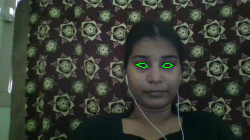

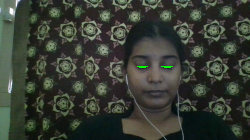

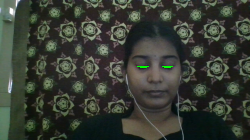

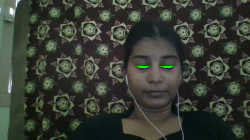

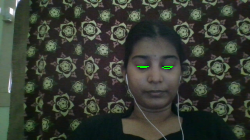

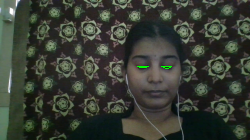

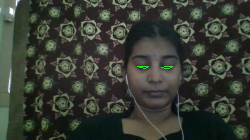

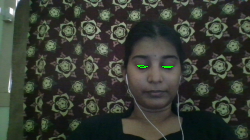

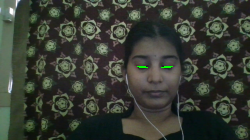

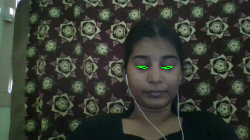

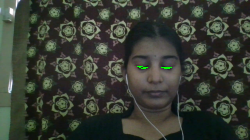

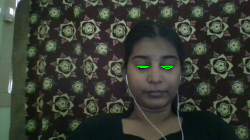

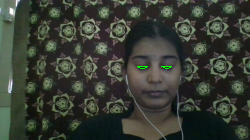

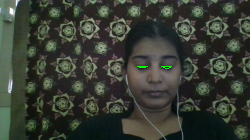

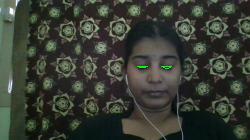

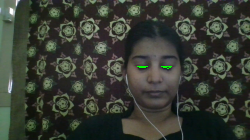

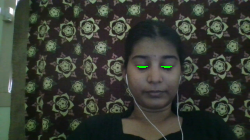

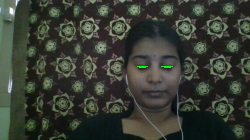

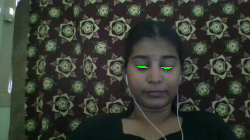

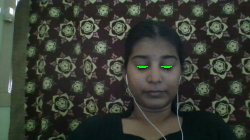

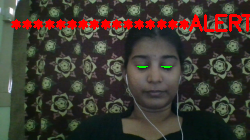

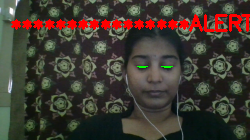

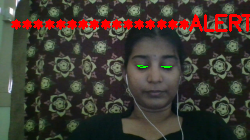

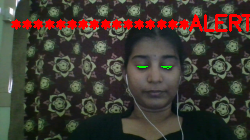

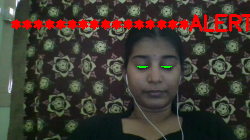

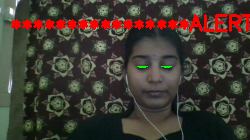

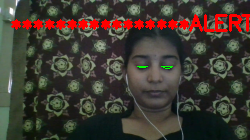

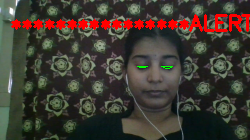

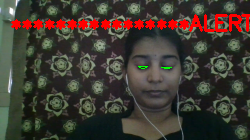

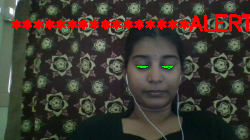

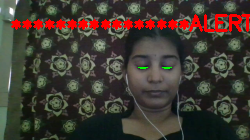

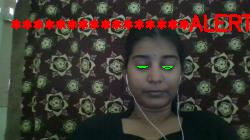

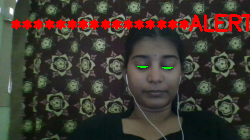

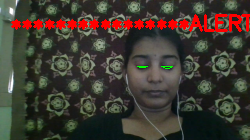

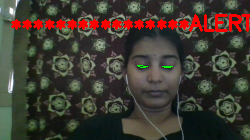

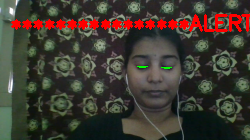

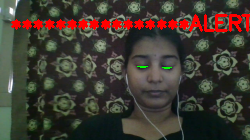

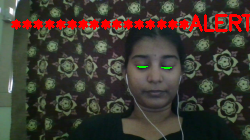

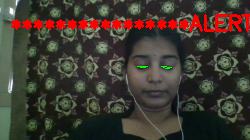

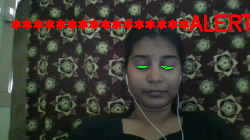

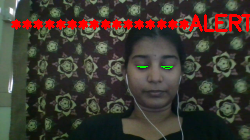

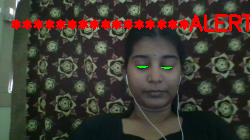

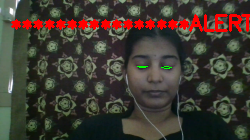

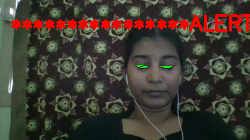

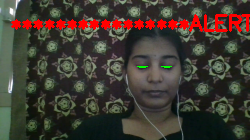

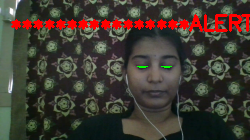

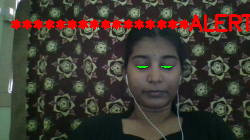

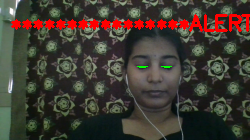

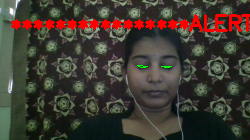

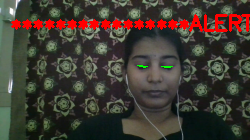

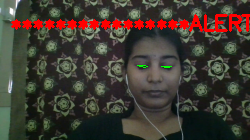

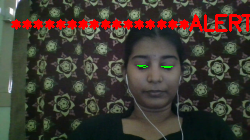

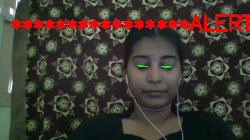

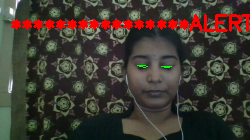

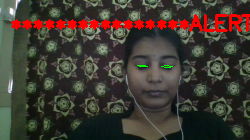

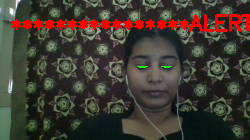

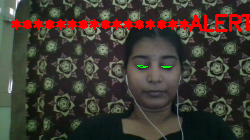

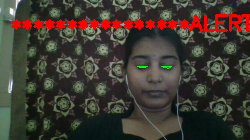

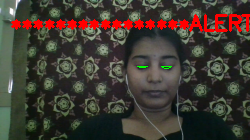

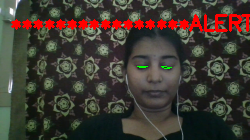

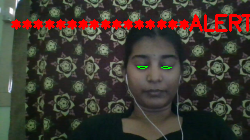

AttributeError: ignored

In [11]:
from google.colab.patches import cv2_imshow
flag=0
while True:
	ret, frame=cap.read()
	frame = imutils.resize(frame, width=250)
	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
	subjects = detect(gray, 0)
	for subject in subjects:
		shape = predict(gray, subject)
		shape = face_utils.shape_to_np(shape)#converting to NumPy Array
		leftEye = shape[lStart:lEnd]
		rightEye = shape[rStart:rEnd]
		leftEAR = eye_aspect_ratio(leftEye)
		rightEAR = eye_aspect_ratio(rightEye)
		ear = (leftEAR + rightEAR) / 2.0
		leftEyeHull = cv2.convexHull(leftEye)
		rightEyeHull = cv2.convexHull(rightEye)
		cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
		cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)
		if ear < thresh:
			flag += 1
			#print (flag)
			if flag >= frame_check:
				cv2.putText(frame, "****************ALERT!****************", (10, 30),
					cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
				cv2.putText(frame, "****************ALERT!****************", (10,325),
					cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
		else:
			flag = 0
	cv2_imshow(frame)
	key = cv2.waitKey(1) & 0xFF
	if key == ord("q"):
		cv2.destroyAllWindows()
		cap.release()
		break
